   ID number  Diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0     842302          4        17.99         10.38          122.80     1001.0   
1     842517          4        20.57         17.77          132.90     1326.0   
2   84300903          4        19.69         21.25          130.00     1203.0   
3   84348301          4        11.42         20.38           77.58      386.1   
4   84358402          4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst radius  worst texture  worst perimet

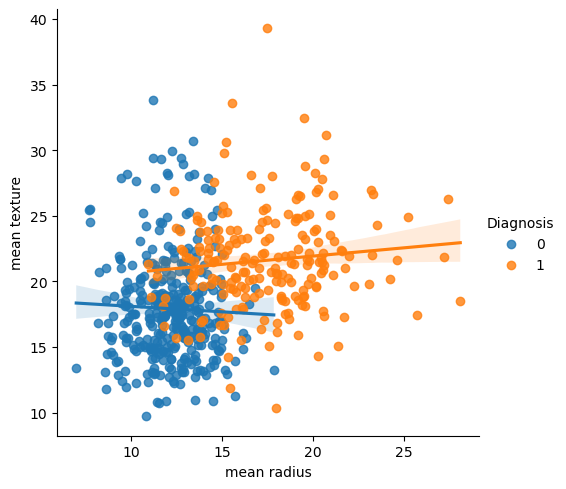

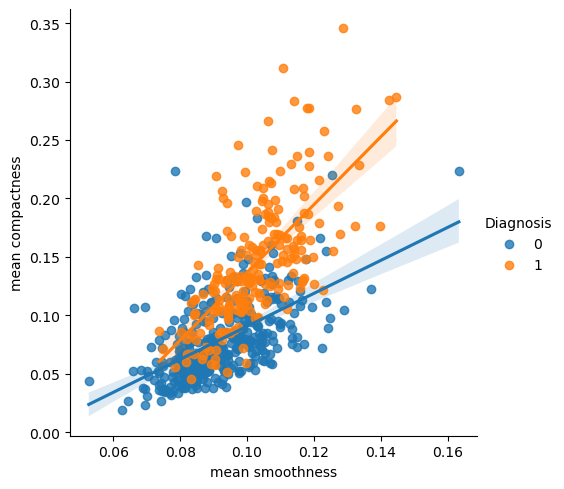

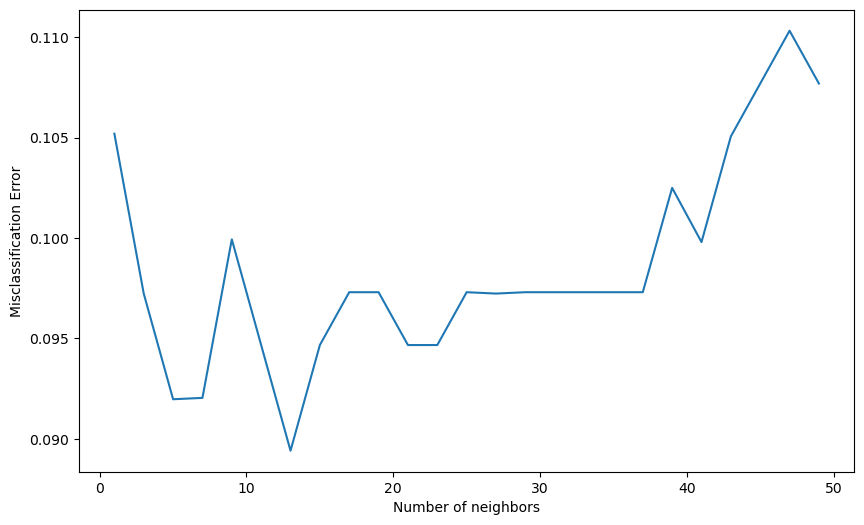

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings            
warnings.filterwarnings('ignore')


data = "D:\CDAC Internship 2023\Breast_Cancer_Dataset\wdbc.csv"  # Dataset is in form of a CSV File.   
df = pd.read_csv(data) 
print(df.head())


def diagnosis_value(diagnosis):
    if diagnosis == 4:
        return 1
    else:
        return 0
  
df['Diagnosis'] = df['Diagnosis'].apply(diagnosis_value)
sns.lmplot(x = 'mean radius', y = 'mean texture', hue = 'Diagnosis', data = df)
sns.lmplot(x ='mean smoothness', y = 'mean compactness', 
           data = df, hue = 'Diagnosis')

df.drop(['Diagnosis', 'ID number'],axis=1)

X = np.array(df.iloc[:, 1:])
y = np.array(df['Diagnosis'])

from sklearn.model_selection import train_test_split

Training_Data, Testing_Data, Output_Training_Data, Output_Testing_Data = train_test_split(X, y, test_size = 0.33,
                                                                                          random_state = 42)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(Training_Data, Output_Training_Data)

print("Accuracy of Model :")
print(knn.score(Testing_Data, Output_Testing_Data))

neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, Training_Data, Output_Training_Data, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()